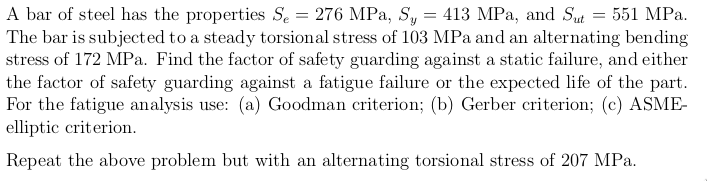

In [1]:
Se = 276
Sy = 413
Sut = 551

In [2]:
sigma_a = 172
sigma_m = 0
tau_a = 207
tau_m = 0

## Factor of safety against static failure:

We have to first determine the maximum stresses by adding the amplitude of the stresses to the mean (or, mid-range) stresses:

In [3]:
sigma_max = sigma_m + sigma_a
tau_max = tau_m + tau_a
display(sigma_max, tau_max)

172

207

Next, we determine the von Mises stress corresponding to these maximum stresses:

In [4]:
sigma_vM_max = (sigma_max**2 + 3*tau_max**2)**(1/2)

Finally, we can obtain the factor of safety against static failure:

In [5]:
n_s = Sy/sigma_vM_max
display(n_s)

1.0385837972693979

## For fatigue failure:

Note that since both the bending and the torsional mean stresses are zero, this is a case of pure alternating i.e a completely reversed stress. 

So, we do not have to apply the Goodman, Gerber or ASME-elliptic criteria which are actually meant for fluctuating stresses i.e. for stresses that are not completely reversed. 

However, it is still a case of combined loading mode (bending+torsion). 

So, we first determine the von Mises stress corresponding to the alternating stress:

In [6]:
sigma_vM_a = (sigma_a**2 + 3*tau_a**2)**(1/2)

display(sigma_vM_a)

397.65688727846776

We next compare this von Mises stress with the endurance limit:

In [7]:
nf = Se/sigma_vM_a
display(nf)

0.6940656853422611

Since this factor of safety turns out to be less than 1, the operating stresses correspond to finite life. To determine the number of cycles corresponding to this finite life, we have to use the S-N diagram. Note that this can be done because our operating stresses are completely reversed. 

We first determine the factor $f$ from Fig. 6-23 (Shigley, 10th edition). 

In [8]:
f = 0.87 # Using eye-estimate corresponding to Sut = 551 MPa. 

We next calculate $f S_{ut}$:

In [9]:
display(f*Sut)

479.37

Since our operating stress $S_f =$ sigma_vM_a is such that: $S_e < S_f < f S_{ut}$, 
we are in the mid-segment of the S-N diagram, i.e. high cycle, finite life.

To determine the number of cycles $N$ from the relation $S_f = a N^b$, we need to find $a$ and $b$. 

\begin{align*}
a &= \frac{(f S_{ut})^2}{S_e}, \\
b &= -\frac{1}{3} \log\left( \frac{fS_{ut}}{S_e} \right)
\end{align*}

In [10]:
from math import log10

In [11]:
a = (f*Sut)**2/Se
b = -1/3*log10(f*Sut/Se)
display(a, b)

832.5927423913043

-0.07992058980172863

In [12]:
Sf = sigma_vM_a

N = (Sf/a)**(1/b)
display(N)

10364.236991152015